# Diabetes Prediction

## Importing necessary packages


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data Exporatory Analysis

In [140]:
#Reading the data
data=pd.read_csv("diabetes.csv")
accuracy_dic={} # To store the accuracy of different models and visualise them
print(data.head())
print(data.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [141]:
#Printing the sum of null values if exist in any variable
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [142]:
#Checking the data types to ensure whether the data is read with the proper data type
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [143]:
#Description of our data
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Here we can see there are various categories where the data is read '0' such as Glucose, BloodPressure,SkinThickness, Insulin and BMI.

The count of values as 0 in Glucose are 5


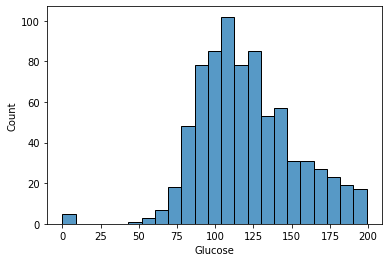

In [144]:
#Let's check how many values are as 0 Glucose in count
sns.histplot(x=data['Glucose'])
print("The count of values as 0 in Glucose are",data[data['Glucose']==0].shape[0])

The count of values as 0 in Blood Pressure are 35


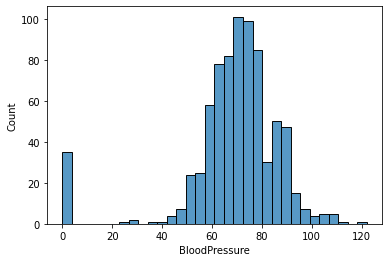

In [145]:
#Let's check how many values are as 0 BloodPressure in count

sns.histplot(x=data['BloodPressure'])
print("The count of values as 0 in Blood Pressure are",data[data['BloodPressure']==0].shape[0])

The count of values as 0 in Skin Thickness are 227


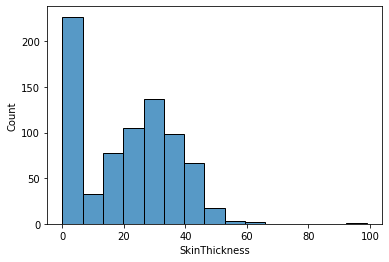

In [146]:
#Let's check how many values are as 0 SkinThickness in count

sns.histplot(x=data['SkinThickness'])
print("The count of values as 0 in Skin Thickness are",data[data['SkinThickness']==0].shape[0])

The count of values as 0 in Insulin are 374


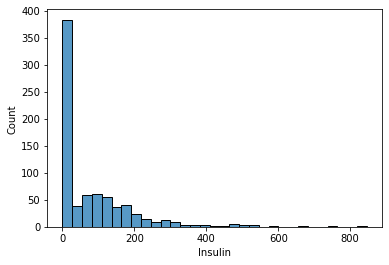

In [147]:
#Let's check how many values are as 0 Insulin in count
sns.histplot(x=data['Insulin'])
print("The count of values as 0 in Insulin are",data[data['Insulin']==0].shape[0])

The count of values as 0 in BMI are 11


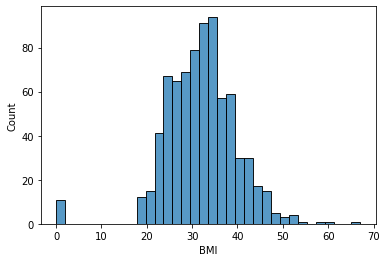

In [148]:
#Let's check how many values are as 0 BMI in count
sns.histplot(data['BMI'])
print("The count of values as 0 in BMI are",data[data['BMI']==0].shape[0])

The count of values as 0 in Diabetes Pedigree Function are 0


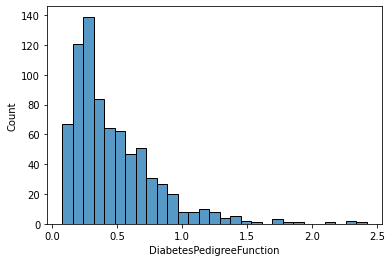

In [149]:
#Let's check how many values are as 0 DiabetesPedigreeFunction in count

sns.histplot(x=data['DiabetesPedigreeFunction'])
print("The count of values as 0 in Diabetes Pedigree Function are",data[data['DiabetesPedigreeFunction']==0].shape[0])
#There are no value inserted as 0 in DiabetesPedigreFunction

### Conclusion of Exploratory Data Analysis is : 

In [150]:
print("The count of values as 0 in Glucose are",data[data['Glucose']==0].shape[0])
print("The count of values as 0 in Blood Pressure are",data[data['BloodPressure']==0].shape[0])
print("The count of values as 0 in Skin Thickness are",data[data['SkinThickness']==0].shape[0])
print("The count of values as 0 in Insulin are",data[data['Insulin']==0].shape[0])
print("The count of values as 0 in BMI are",data[data['BMI']==0].shape[0])
print("The count of values as 0 in Diabetes Pedigree Function are",data[data['DiabetesPedigreeFunction']==0].shape[0])
print("The count of values as 0 in Age are",data[data['Age']==0].shape[0])


The count of values as 0 in Glucose are 5
The count of values as 0 in Blood Pressure are 35
The count of values as 0 in Skin Thickness are 227
The count of values as 0 in Insulin are 374
The count of values as 0 in BMI are 11
The count of values as 0 in Diabetes Pedigree Function are 0
The count of values as 0 in Age are 0


### Work to be done on the data

We have to fill these values to build ML models on the data

In [151]:
# Replaced the 0 values with mean of particular categories
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())


In [152]:
# Let's check the data again for 0 values
print("The count of values as 0 in Glucose are",data[data['Glucose']==0].shape[0])
print("The count of values as 0 in Blood Pressure are",data[data['BloodPressure']==0].shape[0])
print("The count of values as 0 in Skin Thickness are",data[data['SkinThickness']==0].shape[0])
print("The count of values as 0 in Insulin are",data[data['Insulin']==0].shape[0])
print("The count of values as 0 in BMI are",data[data['BMI']==0].shape[0])
print("The count of values as 0 in Diabetes Pedigree Function are",data[data['DiabetesPedigreeFunction']==0].shape[0])
print("The count of values as 0 in Age are",data[data['Age']==0].shape[0])


The count of values as 0 in Glucose are 0
The count of values as 0 in Blood Pressure are 0
The count of values as 0 in Skin Thickness are 0
The count of values as 0 in Insulin are 0
The count of values as 0 in BMI are 0
The count of values as 0 in Diabetes Pedigree Function are 0
The count of values as 0 in Age are 0


### Summary of New Data

In [153]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  

## Building Prediciton Models on finalized data

## Decision Tree Classifier

In [154]:
#Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [155]:
#Separating target and feature variables
y=data['Outcome'].values
column_list=list(data.columns)
features=list(set(column_list)-set(['Outcome']))
x=data[features].values

In [156]:
#Building Decision Tree Regressor Model
Decision_classifier_model=DecisionTreeClassifier(random_state=0)
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=True)
Decision_classifier_model.fit(train_x,train_y)
predictions=Decision_classifier_model.predict(test_x)
accuracy=accuracy_score(test_y,predictions)

In [157]:
#Let's get the outcome of the model we built
print(accuracy*100,'%')
print("Missclassified Samples : ",(test_y!=predictions).sum())

67.1875 %
Missclassified Samples :  63


## Decision Tree Classifier after removing insignificant variable

In [158]:
#Dropping the 'SkinThickness' variable from the copied dataset
data2=data.copy()
data2=data2.drop(['SkinThickness'],axis=1)
print(data2.columns)
print(data2.shape)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(768, 8)


In [159]:
#Separating the features and target variable
y=data2.Outcome
features2=features
features2.remove('SkinThickness')
x=data2[features2]

In [160]:
#Now let's apply the same model again

classifier_model=DecisionTreeClassifier(random_state=0)
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=True)
classifier_model.fit(train_x,train_y)
predictions=classifier_model.predict(test_x)
accuracy=accuracy_score(test_y,predictions)

In [161]:
#Getting the outcome of the model
print(accuracy*100,'%')
print("Misclassified Samples : ", (test_y!=predictions).sum())
accuracy_dic['Decision Tree']=accuracy*100

#We have seen accuracy is same and misclassified samples are also same

68.22916666666666 %
Misclassified Samples :  61


## Random Forest Classifier

In [162]:
#Import necessary Libraries
from sklearn.ensemble import RandomForestClassifier

In [163]:
#Build the Random Forest Classifier model
random_forest_model=RandomForestClassifier()
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0)
random_forest_model.fit(train_x,train_y)
predictions=random_forest_model.predict(test_x)
accuracy=accuracy_score(test_y,predictions)

In [164]:
#Get the outcome of the model
print(accuracy*100,'%')
print("Misclassified samples : ",(test_y!=predictions).sum())
accuracy_dic['Random Forest']=accuracy*100


79.16666666666666 %
Misclassified samples :  40


## Logistic Regression

In [165]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression

In [166]:
#Building the model

Logistic_model=LogisticRegression(solver='lbfgs',max_iter=150) #We are providing the maximum iteration to the model. This is to solve the lbfgs warning which we will get while predicting, however it doesn't affect the result.
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0)
Logistic_model.fit(train_x,train_y)
predictions=Logistic_model.predict(test_x)
accuracy=accuracy_score(test_y,predictions)

In [167]:
#Getting the outcome of model
print(accuracy*100,'%')
print("Misclassified Samples : ", (test_y!=predictions).sum())
accuracy_dic['Logistic Regression']=accuracy*100

#We can see that Logistic model is giving a very much better accuracy when compared to Decision Tree Regressor and also misclassified samples are less.


79.6875 %
Misclassified Samples :  39


## SVM Classifier

In [168]:
#Importing necessary libraries
from sklearn import svm

In [169]:
#Build the SVC model
svm_model=svm.SVC(kernel='linear')
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0)
svm_model.fit(train_x,train_y)
predictions=svm_model.predict(test_x)
accuracy=accuracy_score(test_y,predictions)

In [170]:
#Get the Outcome of the model
print(accuracy*100,'%')
print("Misclassified samples : ",(test_y!=predictions).sum())
accuracy_dic['SVM Classifier']=accuracy*100


79.16666666666666 %
Misclassified samples :  40


## Naive Bayes 

In [171]:
#Importing necessary libraries
from sklearn.naive_bayes import GaussianNB

In [172]:
#Build the Naive Bayes model
naive_model=GaussianNB()
naive_model.fit(train_x,train_y)
predictions=naive_model.predict(test_x)
accuracy=accuracy_score(test_y,predictions)

In [173]:
#Get the outcome of the model
print(accuracy*100,'%')
print("Misclassified samples : ",(test_y!=predictions).sum())
accuracy_dic['Naive Bayes']=accuracy*100


78.125 %
Misclassified samples :  42


## KNN Classifier 

In [174]:
#importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier

In [175]:
#Build the KNN model 
knn_model=KNeighborsClassifier(n_neighbors=5)
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0)
knn_model.fit(train_x,train_y)
predictions=knn_model.predict(test_x)
accuracy=accuracy_score(test_y,predictions)

In [176]:
#Get the outcome of the model
print(accuracy*100,'%')
print("Misclassified Samples : ", (test_y!=predictions).sum())
accuracy_dic['KNN']=accuracy*100


75.0 %
Misclassified Samples :  48


In [177]:
#Since the KNN model gave us less accuracy
#Let's check the accuracy by changing the number of neighbors
misclassified=[]
for neighbors in range(1,20):
    knn_model=KNeighborsClassifier(n_neighbors=neighbors)
    knn_model.fit(train_x,train_y)
    pred_neighbors=knn_model.predict(test_x)
    misclassified.append((test_y!=pred_neighbors).sum())
print(misclassified)

[67, 57, 53, 48, 48, 49, 49, 47, 50, 47, 47, 45, 44, 45, 44, 45, 46, 45, 47]


### Here neighbors=15 gives the lowest number of misclassified samples that is 44. However it is greater than the misclassified samples we got in logistic regression

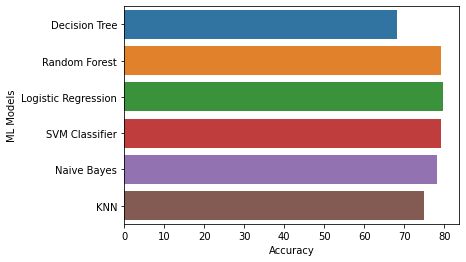

In [230]:
# Let's visualize the accuracy of the models that we built on the data for better understanding

models=list(accuracy_dic.keys()) # Stored the keys which are model names in the list named 'model'

acc=list(accuracy_dic.values()) # Stored the values which are accuracy of models in the list named 'acc'

bar_plot=sns.barplot(x=acc,y=models)
bar_plot.set_xlabel('Accuracy')
bar_plot.set_ylabel('ML Models')
#plt.xticks(rotation=45)
plt.show()


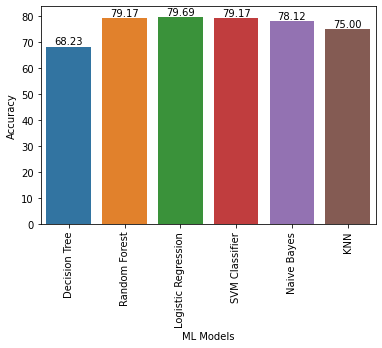

In [234]:
dd=pd.DataFrame(accuracy_dic,index=['Accuracy'])
g=sns.barplot(x=models,y=acc)
g.set_xlabel('ML Models')
g.set_ylabel('Accuracy')
plt.xticks(rotation=90)
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

### So till now 'LogisticRegression' is the best model proved in terms of accuracy

# <b> End of Script